In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap
import calendar

In [3]:
df = pd.read_csv("us_tornado_dataset_1950_2021.csv")
df

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,1950-01-03,IL,3,3,0,39.1000,-89.3000,39.1200,-89.2300,3.60,130
1,1950,1,3,1950-01-03,MO,3,3,0,38.7700,-90.2200,38.8300,-90.0300,9.50,150
2,1950,1,3,1950-01-03,OH,1,1,0,40.8800,-84.5800,0.0000,0.0000,0.10,10
3,1950,1,13,1950-01-13,AR,3,1,1,34.4000,-94.3700,0.0000,0.0000,0.60,17
4,1950,1,25,1950-01-25,IL,2,0,0,41.1700,-87.3300,0.0000,0.0000,0.10,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67553,2021,12,30,2021-12-30,GA,1,0,0,31.1703,-83.3804,31.1805,-83.3453,2.19,150
67554,2021,12,30,2021-12-30,GA,1,0,0,31.6900,-82.7300,31.7439,-82.5412,11.71,300
67555,2021,12,31,2021-12-31,AL,1,0,0,34.2875,-85.7878,34.2998,-85.7805,0.95,50
67556,2021,12,31,2021-12-31,GA,1,0,0,33.7372,-84.9998,33.7625,-84.9633,2.75,150


In [4]:
df.rename(columns = {'fat':'fatalities', 'len':'length', 'st':'state','inj':'injuries'}, inplace = True)
df

,yr,mo,dy,date,state,mag,injuries,fatalities,slat,slon,elat,elon,length,wid
0,1950,1,3,1950-01-03,IL,3,3,0,39.1000,-89.3000,39.1200,-89.2300,3.60,130
1,1950,1,3,1950-01-03,MO,3,3,0,38.7700,-90.2200,38.8300,-90.0300,9.50,150
2,1950,1,3,1950-01-03,OH,1,1,0,40.8800,-84.5800,0.0000,0.0000,0.10,10
3,1950,1,13,1950-01-13,AR,3,1,1,34.4000,-94.3700,0.0000,0.0000,0.60,17
4,1950,1,25,1950-01-25,IL,2,0,0,41.1700,-87.3300,0.0000,0.0000,0.10,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67553,2021,12,30,2021-12-30,GA,1,0,0,31.1703,-83.3804,31.1805,-83.3453,2.19,150
67554,2021,12,30,2021-12-30,GA,1,0,0,31.6900,-82.7300,31.7439,-82.5412,11.71,300
67555,2021,12,31,2021-12-31,AL,1,0,0,34.2875,-85.7878,34.2998,-85.7805,0.95,50
67556,2021,12,31,2021-12-31,GA,1,0,0,33.7372,-84.9998,33.7625,-84.9633,2.75,150


In [5]:
df.isna().sum()

yr            0
mo            0
dy            0
date          0
state         0
mag           0
injuries      0
fatalities    0
slat          0
slon          0
elat          0
elon          0
length        0
wid           0
dtype: int64

In [6]:
df['mag'].unique()


array([ 3,  1,  2,  4,  0,  5, -9], dtype=int64)

In [7]:
df['mag'].value_counts()

 0    31375
 1    22885
 2     9517
 3     2536
-9      605
 4      581
 5       59
Name: mag, dtype: int64

Text(0.5, 1.0, 'Tornadoes in the US')

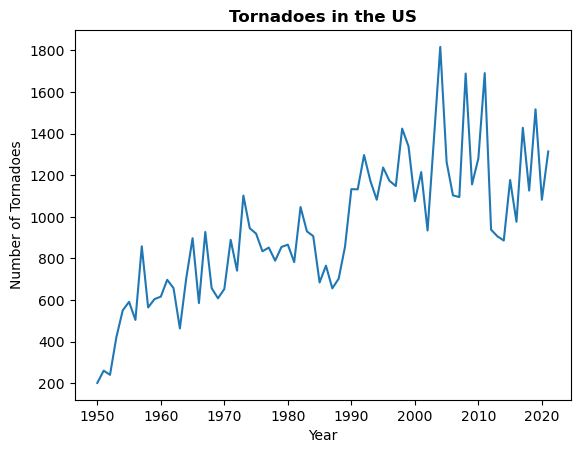

In [8]:
df1 = df.groupby('yr')['yr'].count()


plt.plot(df1)
plt.xlabel('Year')
plt.ylabel('Number of Tornadoes')
plt.title('Tornadoes in the US',fontweight='bold')

Text(0.5, 1.0, 'Top 10 states with the highest number of tornadoes')

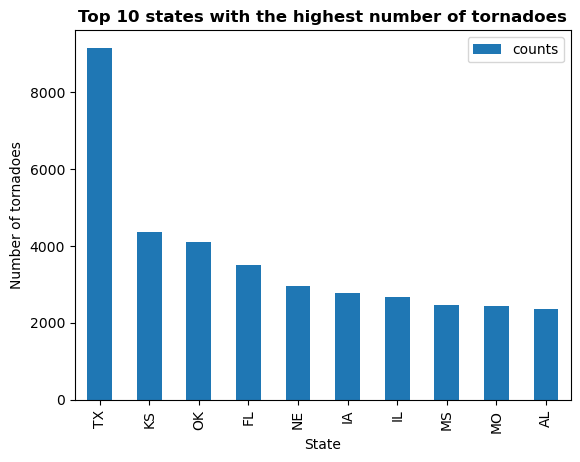

In [9]:
df2 = df.groupby('state')['state'].count().reset_index(name = 'counts').sort_values(['counts'],ascending = False)
df2.head(10).plot(x = 'state', kind = 'bar')
plt.xlabel('State')
plt.ylabel('Number of tornadoes')
plt.title('Top 10 states with the highest number of tornadoes',fontweight='bold')


In [12]:
import plotly.express as px

fig = px.choropleth(df2,
                     locations = 'state',
                     locationmode = 'USA-states',
                     color = 'counts',
                     color_continuous_scale = 'REDS',
                     scope = 'usa',
                    
                   )

fig.update_layout(title_text='Count of tornadoes across the states in the US.<br>(Hover for statewise counts)')

fig.show()

Text(0.5, 1.0, 'Number of tornadoes per month throughout the US')

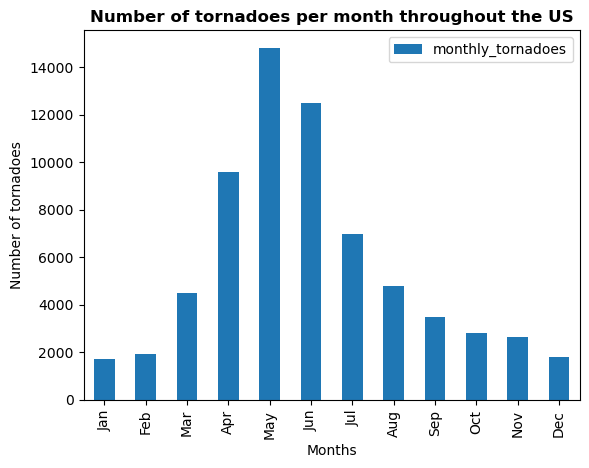

In [11]:
df_months_count = df.groupby('mo')['mo'].count().reset_index(name = 'monthly_tornadoes')
df_months_count['mo'] = df_months_count['mo'].apply(lambda x: calendar.month_abbr[x])
df_months_count.plot(x = 'mo', kind = 'bar')
plt.xlabel('Months')
plt.ylabel('Number of tornadoes')
plt.title('Number of tornadoes per month throughout the US',fontweight='bold')

<AxesSubplot:xlabel='state'>

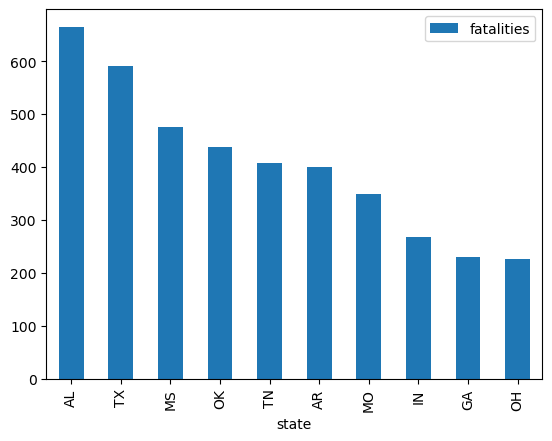

In [22]:
fatalities = df.groupby('state')['fatalities'].sum().reset_index().sort_values('fatalities', ascending = False)
fatalities.head(10).plot(x = 'state', kind = 'bar')